### Import packages:

In [1]:
# Data manipulations
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tests:
import scipy.stats as stats

### Import datasets:

In [2]:
customers = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Python Foundation End to End Case Study E-Commerce Analytics Project\CUSTOMERS.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [3]:
customers.info()

### All the columns comprising data of categorical type & there are no null values in customers dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
### unique values in each columns

customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 20
dtype: int64

In [5]:
sellers = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Python Foundation End to End Case Study E-Commerce Analytics Project\SELLERS.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [6]:
sellers.info()

# all columns are of type categorical and missing values are there in datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [7]:
### Missing values:

sellers.isna().sum()

### there are 57 missing values in seller_city & seller_state

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [8]:
### Drop the missing values data:

sellers.dropna(axis= 0, inplace= True)

In [9]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3038 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3038 non-null   object
 1   seller_zip_code_prefix  3038 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 118.7+ KB


In [10]:
### Unique values in each column:
sellers.nunique()

seller_id                 3038
seller_zip_code_prefix    2185
seller_city                534
seller_state                19
dtype: int64

In [11]:
products = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Python Foundation End to End Case Study E-Commerce Analytics Project\PRODUCTS.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [13]:
### Missing values:
products.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [14]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [15]:
# Impute missing values with mean for continuous variables:

continuous_vars = ['product_name_lenght','product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']
for var in continuous_vars:
    mean_value = products[var].mean()
    products[var].fillna(mean_value, inplace=True)
    
# Impute missing values with mode for categorical variables
categorical_vars = ['product_category_name']
for var in categorical_vars:
    mode_value = products[var].mode()[0]
    products[var].fillna(mode_value, inplace=True)

In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [17]:
### Unique values in each column:
products.nunique()

product_id                    32951
product_category_name            71
product_name_lenght              67
product_description_lenght     2961
product_photos_qty               20
product_weight_g               2205
product_length_cm               100
product_height_cm               103
product_width_cm                 96
dtype: int64

In [18]:
orders = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDERS.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [20]:
### Missing values:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
### Drop the missing values data:

orders.dropna(axis= 0, inplace= True)

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [23]:
### Convert data type to date/time where required

orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)

In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [25]:
### Unique values in each column:
orders.nunique()

order_id                         96461
customer_id                      96461
order_status                         2
order_purchase_timestamp         86341
order_approved_at                49451
order_delivered_carrier_date     61005
order_delivered_customer_date    75637
order_estimated_delivery_date      445
dtype: int64

In [26]:
order_items = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_ITEMS.csv")
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [27]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [28]:
### Missing values:
order_items.isna().sum()

## No missing values in order items dataset

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [29]:
### Convert shipping_limit_date data type from object to date/time

order_items['shipping_limit_date'] = pd.to_datetime(order_items.shipping_limit_date)

In [30]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [31]:
order_payments = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_PAYMENTS.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [32]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [33]:
# Missing values:
order_payments.isna().sum()

# no missing values in order payment dataset

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [34]:
order_review_rating = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv")
order_review_rating.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [35]:
order_review_rating.info()

## No null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [36]:
### Convert data type from object to date/time of required datasets:

order_review_rating['review_creation_date'] = pd.to_datetime(order_review_rating.review_creation_date)
order_review_rating['review_answer_timestamp'] = pd.to_datetime(order_review_rating.review_answer_timestamp)

In [37]:
order_review_rating.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [38]:
geo_location = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Python Foundation End to End Case Study E-Commerce Analytics Project\GEO_LOCATION.csv")
geo_location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [39]:
geo_location.info()

# No missing values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


### Business Objectives

In [40]:
### High_level_metrices

In [41]:
order_orderpayment = pd.merge(left= orders, right= order_payments,how= 'left', on= 'order_id')

In [42]:
order_payments_items = pd.merge(left = order_orderpayment, right = order_items, how = 'left', on = 'order_id')

In [43]:
print('Total unique customers = ', customers.customer_id.nunique())
print('Total unique products = ', products.product_id.nunique() )
print('Total number of product category =', products.product_category_name.nunique())
print('Total number of orders = ', orders.order_id.count())
print('Total number of sellers =', sellers.seller_id.count())
print('Total unique locations =', geo_location.geolocation_zip_code_prefix.nunique())
print('Total number of cities =', geo_location.geolocation_city.nunique())
print('Total sales amount = ', order_payments.payment_value.sum())

Total unique customers =  99441
Total unique products =  32951
Total number of product category = 71
Total number of orders =  96461
Total number of sellers = 3038
Total unique locations = 19015
Total number of cities = 3809
Total sales amount =  16008872.12


In [44]:
### Different mode of payment:

pd.DataFrame(order_payments.payment_type.value_counts())

### So, there are 4 different mode of payments & maximum payments are done using credit_caed

,payment_type
credit_card,76795
UPI,19784
voucher,5775
debit_card,1529
not_defined,3


In [45]:
### top 10 states having maximum customers:

summ_1 = pd.DataFrame(customers.groupby('customer_state').customer_id.count()).sort_values('customer_id', ascending= True).tail(10)

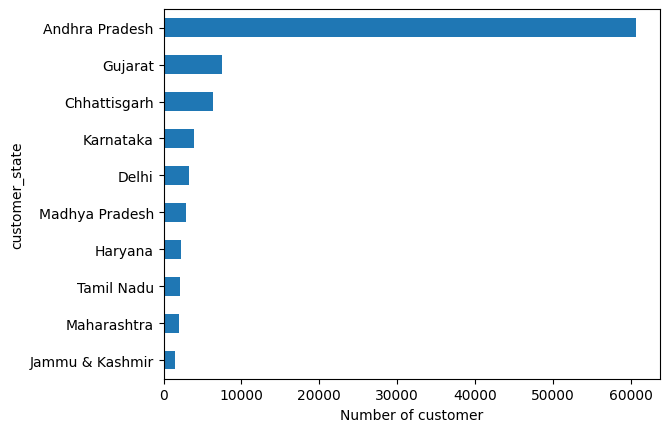

In [46]:
summ_1.plot(kind = 'barh', legend = False)
plt.xlabel('Number of customer')
plt.show()

## Andhra Pradesh have the maximum number of customers

In [47]:
# Number of customers on yearly and monthly basis:

orders['month'] = orders.order_purchase_timestamp.dt.month
orders['year'] = orders.order_purchase_timestamp.dt.year

In [48]:
summ_2 = pd.crosstab(index= orders.month, columns= orders.year, values= orders.customer_id, aggfunc= 'count')
summ_2

year,2016,2017,2018
month,,,
1,NaN,748.0,7069.0
2,NaN,1641.0,6556.0
3,NaN,2546.0,7003.0
4,NaN,2303.0,6798.0
5,NaN,3545.0,6749.0
6,NaN,3135.0,6096.0
7,NaN,3872.0,6156.0
8,NaN,4193.0,6351.0
9,1.0,4149.0,NaN


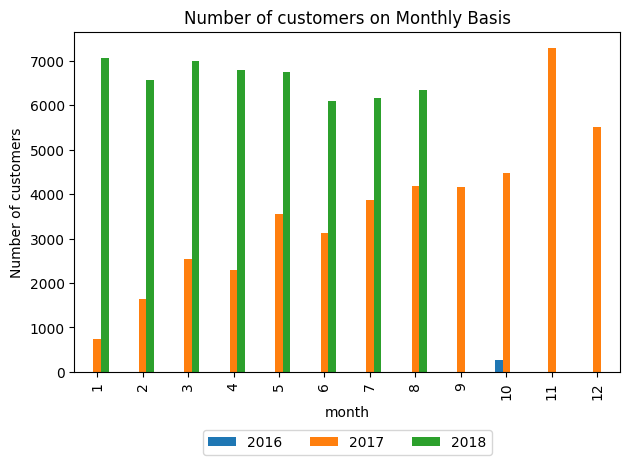

In [49]:
summ_2.plot(kind = 'bar')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.ylabel('Number of customers')
plt.title('Number of customers on Monthly Basis')
plt.tight_layout()
plt.show()

#### there was no such trend on monthly basis, but in most of months customers increases with months
#### But from year 2017 to 2018 number of customers increases when compared from each month of both years.

### new customers acquired every month

In [50]:
# Step 1: Sort the data by 'order_purchase_timestamp' to ensure chronological order
orders.sort_values(by='order_purchase_timestamp', inplace=True)

# Step 2: Identify and exclude repeat customers from each month
new_customers_per_month = []
previous_customers = set()

for _, row in orders.iterrows():
    customer_id = row['customer_id']
    order_month = row['order_purchase_timestamp'].strftime('%Y-%m')
    
    if customer_id not in previous_customers:
        new_customers_per_month.append((order_month, customer_id))
        previous_customers.add(customer_id)

# Step 4: Group the data by month and count the number of new customers in each month
new_customers_per_month = pd.DataFrame(new_customers_per_month, columns=['year_month', 'customer_id'])
new_customers_count = new_customers_per_month.groupby('year_month').size()

# Print the result
print(new_customers_count)

year_month
2016-09       1
2016-10     270
2016-12       1
2017-01     748
2017-02    1641
2017-03    2546
2017-04    2303
2017-05    3545
2017-06    3135
2017-07    3872
2017-08    4193
2017-09    4149
2017-10    4478
2017-11    7288
2017-12    5513
2018-01    7069
2018-02    6556
2018-03    7003
2018-04    6798
2018-05    6749
2018-06    6096
2018-07    6156
2018-08    6351
dtype: int64


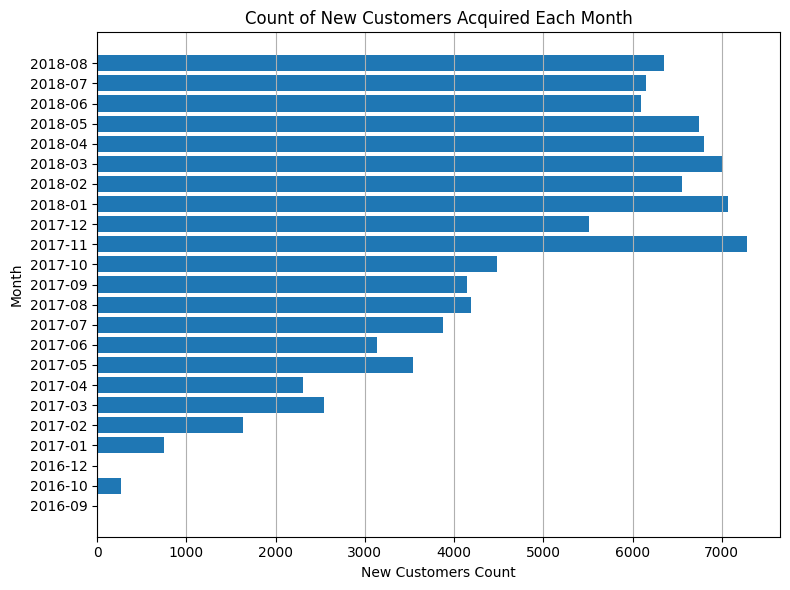

In [51]:
plt.figure(figsize=(8, 6))
plt.barh(new_customers_count.index, new_customers_count.values)
plt.ylabel('Month')
plt.xlabel('New Customers Count')
plt.title('Count of New Customers Acquired Each Month')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

### Comparison of revenue on monthly & yearly basis

In [52]:
# Step 1: Extract month and year from 'order_purchase_timestamp'
order_orderpayment['order_month'] = order_orderpayment['order_purchase_timestamp'].dt.month
order_orderpayment['order_year'] = order_orderpayment['order_purchase_timestamp'].dt.year

# Step 2: Group by 'order_month', and 'order_year'
summ_1 = order_orderpayment.groupby(['order_year', 'order_month'])

# Step 3: Calculate revenues for each group
revenues_permonth = pd.DataFrame(summ_1['payment_value'].sum().reset_index())

print(revenues_permonth)

    order_year  order_month  payment_value
0         2016            9           0.00
1         2016           10       47271.20
2         2016           12          19.62
3         2017            1      127430.74
4         2017            2      269458.98
5         2017            3      414369.39
6         2017            4      390952.18
7         2017            5      566872.73
8         2017            6      490225.60
9         2017            7      566403.93
10        2017            8      646000.61
11        2017            9      700976.01
12        2017           10      751140.27
13        2017           11     1153393.22
14        2017           12      843199.17
15        2018            1     1078606.86
16        2018            2      966554.97
17        2018            3     1120678.00
18        2018            4     1132933.95
19        2018            5     1128836.69
20        2018            6     1011561.35
21        2018            7     1027383.10
22        2

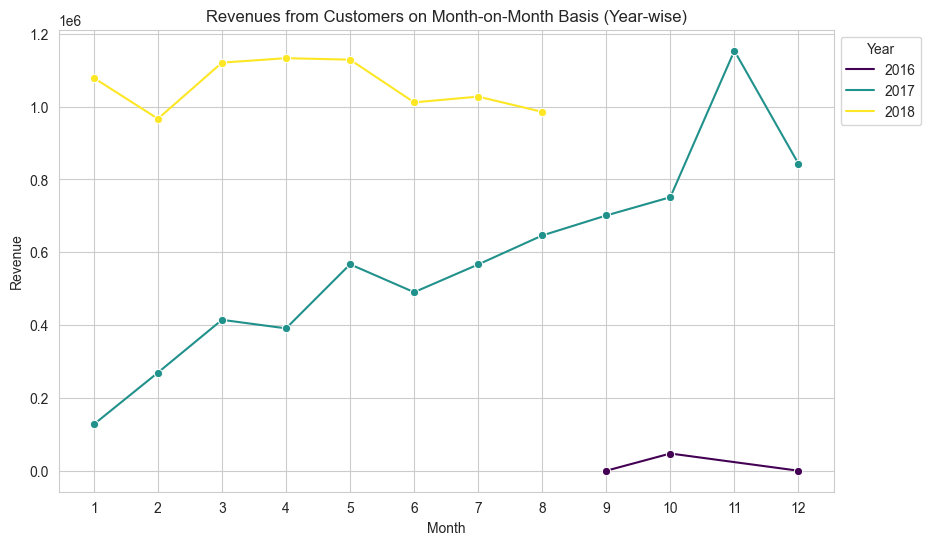

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenues_permonth, x='order_month', y='payment_value', hue='order_year', marker='o', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenues from Customers on Month-on-Month Basis (Year-wise)')
plt.xticks(range(1, 13))
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()

### 
                      1. Revenue was maximum in year 2018.
                      2. In most of the cases revenue increases as the month increases.

### State/City wise revenue

In [54]:
order_orderpayment_cust = pd.merge(left = customers, right = order_orderpayment, how= 'left', on= 'customer_id' )

In [55]:
order_orderpayment_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_month,order_year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,1.0,credit_card,2.0,146.87,5.0,2017.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,1.0,credit_card,8.0,335.48,1.0,2018.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,1.0,credit_card,7.0,157.73,5.0,2018.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,1.0,credit_card,1.0,173.30,3.0,2018.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,1.0,credit_card,8.0,252.25,7.0,2018.0


In [56]:
summ_3 = order_orderpayment_cust.groupby('customer_state')['payment_value'].sum().sort_values()
summ_3

customer_state
Goa                      989.83
Uttaranchal            15909.59
West Bengal            71265.14
Punjab                107083.42
Orissa                113679.90
Himachal Pradesh      117638.75
Rajasthan             145844.65
Uttar Pradesh         178352.03
Arunachal Pradesh     180781.81
Kerala                240830.99
Jammu & Kashmir       245160.79
Maharashtra           326845.90
Haryana               345175.63
Tamil Nadu            359840.55
Madhya Pradesh        480691.55
Delhi                 562501.37
Karnataka             608127.44
Chhattisgarh         1050587.66
Gujarat              1211116.06
Andhra Pradesh       9057259.79
Name: payment_value, dtype: float64

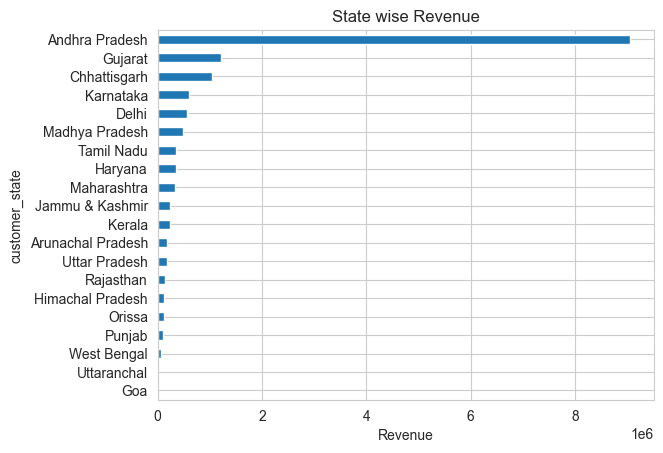

In [57]:
summ_3.plot(kind = 'barh')
plt.xlabel('Revenue')
plt.title('State wise Revenue')
plt.show()

In [58]:
andhra = order_orderpayment_cust[order_orderpayment_cust.customer_state == 'Andhra Pradesh']

In [59]:
summ_4 = andhra.groupby('customer_city')['payment_value'].sum().sort_values().tail(10)
summ_4

customer_city
Jaggayyapet       135458.19
Bestavaripeta     157629.92
Pedana            207790.89
Alwal             209028.97
Eluru             214667.83
Anakapalle        238582.26
Eddumailaram      345221.87
Anantapur         406050.87
Badepalle        1112156.04
Akkarampalle     2108073.49
Name: payment_value, dtype: float64

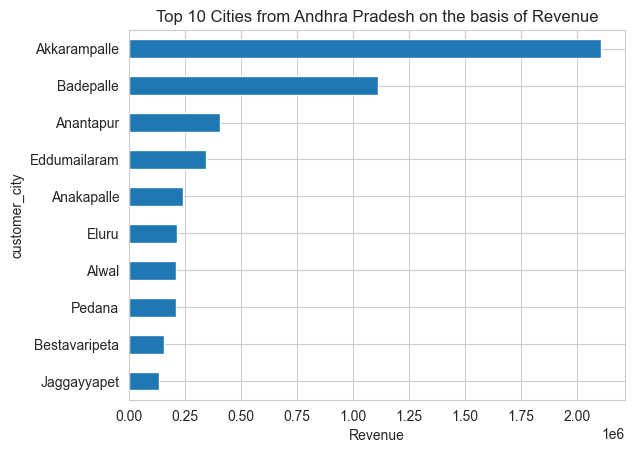

In [60]:
summ_4.plot(kind = 'barh')
plt.xlabel('Revenue')
plt.title('Top 10 Cities from Andhra Pradesh on the basis of Revenue')
plt.show()

###
                            1. 'Andhra Pradesh' generates most of the revenue among all the states.
                            2. In Andhra Pradesh 'Akkarampalle' generates maximum revenue among all the cities.

### Category wise Revenue

In [61]:
ordritem_prdct = pd.merge(left= order_items, right= products, how = 'left', on= 'product_id')

In [62]:
ordritem_prdct_payment = pd.merge(left= ordritem_prdct, right= order_orderpayment, how = 'left', on= 'order_id')

In [63]:
ordritem_prdct_payment.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_month,order_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,Cool_Stuff,58.0,598.0,...,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,1.0,credit_card,2.0,72.19,9.0,2017.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,Pet_Shop,56.0,239.0,...,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,1.0,credit_card,3.0,259.83,4.0,2017.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,Furniture_Decor,59.0,695.0,...,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,1.0,credit_card,5.0,216.87,1.0,2018.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,Perfumery,42.0,480.0,...,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,1.0,credit_card,2.0,25.78,8.0,2018.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,Garden_Tools,59.0,409.0,...,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,1.0,credit_card,3.0,218.04,2.0,2017.0


In [64]:
summ_5 = ordritem_prdct_payment.groupby('product_category_name')['payment_value'].sum().sort_values()
summ_5

product_category_name
Security_And_Services            324.51
Fashion_Childrens_Clothes        718.98
Cds_Dvds_Musicals               1199.43
Home_Comfort_2                  1710.54
Flowers                         2213.01
                                ...    
Watches_Gifts                1387046.31
Furniture_Decor              1393972.04
Computers_Accessories        1549252.47
Health_Beauty                1620868.35
Bed_Bath_Table               1939697.87
Name: payment_value, Length: 71, dtype: float64

In [65]:
top_10_category = summ_5.tail(10)
top_10_category

product_category_name
Cool_Stuff                744339.94
Garden_Tools              810460.70
Auto                      833610.84
Housewares               1069787.97
Sports_Leisure           1349194.08
Watches_Gifts            1387046.31
Furniture_Decor          1393972.04
Computers_Accessories    1549252.47
Health_Beauty            1620868.35
Bed_Bath_Table           1939697.87
Name: payment_value, dtype: float64

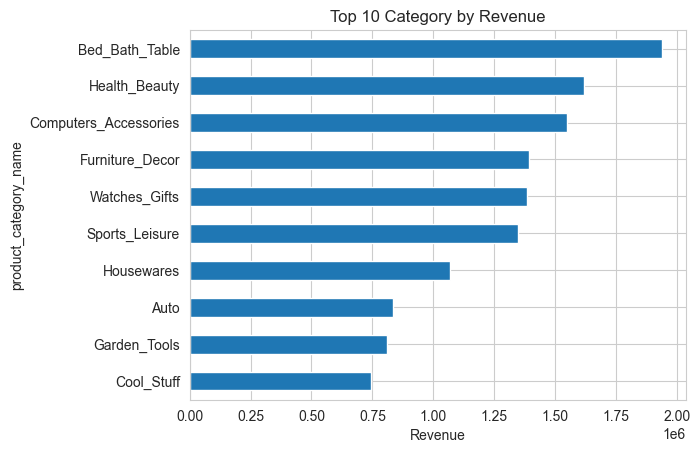

In [66]:
top_10_category.plot(kind = 'barh')
plt.xlabel('Revenue')
plt.title('Top 10 Category by Revenue')
plt.show()

In [67]:
bottom_10_category = summ_5.head(10)
bottom_10_category

product_category_name
Security_And_Services         324.51
Fashion_Childrens_Clothes     718.98
Cds_Dvds_Musicals            1199.43
Home_Comfort_2               1710.54
Flowers                      2213.01
Arts_And_Craftmanship        2326.17
La_Cuisine                   2913.53
Fashion_Sport                3605.83
Diapers_And_Hygiene          4126.17
Fashio_Female_Clothing       4902.67
Name: payment_value, dtype: float64

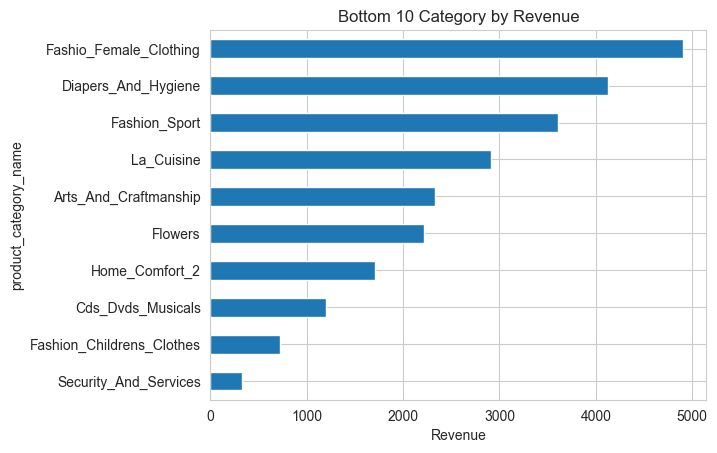

In [68]:
bottom_10_category.plot(kind = 'barh')
plt.xlabel('Revenue')
plt.title('Bottom 10 Category by Revenue')
plt.show()

### 
     'Bed_Bath_Table' has the top sales category among all and 'Security_And_Services' has the least sales among all the               categories.

### Revenue on the basis of payment method

In [69]:
summ_6 = order_orderpayment.groupby('payment_type')['payment_value'].sum().sort_values()
summ_6

payment_type
debit_card       208066.88
voucher          343013.19
UPI             2767977.98
credit_card    12100624.80
Name: payment_value, dtype: float64

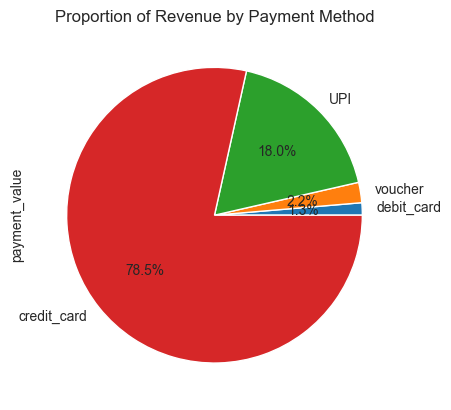

In [70]:
summ_6.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Proportion of Revenue by Payment Method')
plt.show()

### 
        1. Highest payment was done using 'credit card' and then by 'UPI'.
        2. Very less payment was done using 'voucher & debit card '

### Revenue based on seller: 

In [71]:
ordritem_prdct_payment.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_month,order_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,Cool_Stuff,58.0,598.0,...,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,1.0,credit_card,2.0,72.19,9.0,2017.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,Pet_Shop,56.0,239.0,...,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,1.0,credit_card,3.0,259.83,4.0,2017.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,Furniture_Decor,59.0,695.0,...,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,1.0,credit_card,5.0,216.87,1.0,2018.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,Perfumery,42.0,480.0,...,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,1.0,credit_card,2.0,25.78,8.0,2018.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,Garden_Tools,59.0,409.0,...,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,1.0,credit_card,3.0,218.04,2.0,2017.0


In [72]:
summ_8 = ordritem_prdct_payment.groupby('seller_id')['payment_value'].sum().sort_values()
summ_8

seller_id
15ac3c501e2599e4917316fde5c5669a         0.00
b6c6854d4d92a5f6f46be8869da3fa1a         0.00
dff87e4de60c9736ce8df835951b09bc         0.00
3bfad056cf05c00dabe2f895925d83b1         0.00
88af55b4a7ca402b27df16f7c7c9b5d2         0.00
                                      ...    
53243585a1d6dc2643021fd1853d8905    279843.42
1f50f920176fa81dab994f9023523100    289861.38
4a3ca9315b744ce9f8e9374361493884    295830.76
1025f0e2d44d7041d6cf58b6550e0bfa    306000.35
7c67e1448b00f6e969d365cea6b010ab    505437.16
Name: payment_value, Length: 3095, dtype: float64

In [73]:
top_seller_revenue = summ_8.tail(10)
top_seller_revenue

seller_id
6560211a19b47992c3666cc44a7e94c0    176097.10
fa1c13f2614d7b5c4749cbc52fecda94    203262.00
955fee9216a65b617aa5c0531780ce60    232136.06
4869f7a5dfa277a7dca6462dcf3b52b2    261532.48
da8622b14eb17ae2831f4ac5b9dab84a    271733.78
53243585a1d6dc2643021fd1853d8905    279843.42
1f50f920176fa81dab994f9023523100    289861.38
4a3ca9315b744ce9f8e9374361493884    295830.76
1025f0e2d44d7041d6cf58b6550e0bfa    306000.35
7c67e1448b00f6e969d365cea6b010ab    505437.16
Name: payment_value, dtype: float64

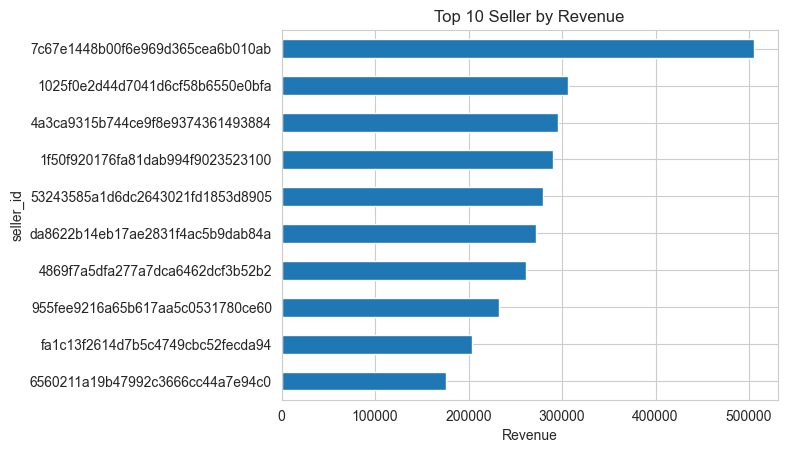

In [74]:
top_seller_revenue.plot(kind = 'barh')
plt.xlabel('Revenue')
plt.title('Top 10 Seller by Revenue')
plt.show()

### 
            Seller '7c67e1448b00f6e969d365cea6b010ab' has the highest revenue among all sellers.

### Popular product by seller

In [75]:
product_orderitem = pd.merge(left= products, right= order_items, how = 'left', on= 'product_id')
product_orderitem.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:00,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:00,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:00,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:00,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:00,37.90,8.29


In [76]:
product_orderitem_seller = pd.merge(left= product_orderitem, right= sellers, how = 'left', on= 'seller_id')
product_orderitem_seller.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:00,10.91,7.39,3694.0,Akkarampalle,Andhra Pradesh
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:00,248.00,17.99,2955.0,Akkarampalle,Andhra Pradesh
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:00,79.80,7.82,2016.0,Akkarampalle,Andhra Pradesh
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:00,112.30,9.54,13330.0,Mehmand,Chhattisgarh
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:00,37.90,8.29,4461.0,Akkarampalle,Andhra Pradesh


In [77]:
seller_prodcat = pd.DataFrame(product_orderitem_seller.groupby(['seller_id','product_category_name'])['order_id'].count().sort_values())
seller_prodcat

,,order_id
seller_id,product_category_name,
ffff564a4f9085cd26170f4732393726,Market_Place,1
929f342384a6607afe143d789ade1316,Garden_Tools,1
92992bec39dde5766f590d3b1f46d465,Sports_Leisure,1
38f276ca6e7cc95a6d1bb55ac9e5550f,Bed_Bath_Table,1
c1f12f926d0ba950578b4fa41115cbb6,Sports_Leisure,1
...,...,...
da8622b14eb17ae2831f4ac5b9dab84a,Bed_Bath_Table,1277
1025f0e2d44d7041d6cf58b6550e0bfa,Furniture_Decor,1292
4a3ca9315b744ce9f8e9374361493884,Bed_Bath_Table,1572


In [78]:
summ_7 = seller_prodcat.tail(10)
summ_7

,,order_id
seller_id,product_category_name,
4869f7a5dfa277a7dca6462dcf3b52b2,Watches_Gifts,1002
7a67c85e85bb2ce8582c35f2203ad736,Cool_Stuff,1069
cc419e0650a3c5ba77189a1882b7556a,Health_Beauty,1091
ea8482cd71df3c1969d7b9473ff13abc,Telephony,1178
7c67e1448b00f6e969d365cea6b010ab,Office_Furniture,1233
da8622b14eb17ae2831f4ac5b9dab84a,Bed_Bath_Table,1277
1025f0e2d44d7041d6cf58b6550e0bfa,Furniture_Decor,1292
4a3ca9315b744ce9f8e9374361493884,Bed_Bath_Table,1572
6560211a19b47992c3666cc44a7e94c0,Watches_Gifts,1628


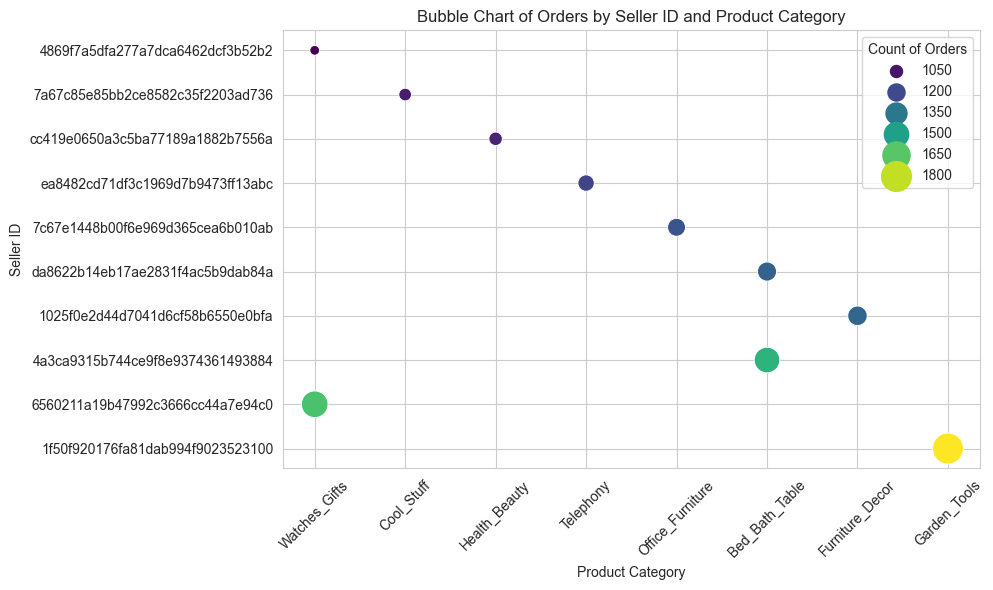

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=summ_7, y='seller_id', x='product_category_name', size='order_id', sizes=(50, 500), hue='order_id', palette='viridis')
plt.title('Bubble Chart of Orders by Seller ID and Product Category')
plt.ylabel('Seller ID')
plt.xlabel('Product Category')
plt.legend(title='Count of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### On the basis of number of order placed:

        Seller ID '1f50f920176fa81dab994f9023523100' placed maximum orders of 'Garden_Tools'.

### Top 10 most expensive product

In [80]:
top_10_expensive_product = product_orderitem.sort_values(by= 'price', ascending= False).head(10)
top_10_expensive_product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
20528,489ae2aa008f021502940f251d4cce7f,Housewares,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:00,6735.00,194.31
73922,69c590f7ffc7bf8db97190b6cb6ed62e,Computers,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:00,6729.00,193.21
49503,1bdf5e6731585cf01aa8169c7028d6ad,Art,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:00,6499.00,227.66
71835,a6492cc69376c469ab6f61d8f44de961,Small_Appliances,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:00,4799.00,151.34
32232,c3ed642d592594bb648ff4a04cee2747,Small_Appliances,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:00,4690.00,74.34
84506,259037a6a41845e455183f89c5035f18,Computers,55.0,1710.0,2.0,2900.0,35.0,10.0,40.0,8dbc85d1447242f3b127dda390d56e19,1,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:00,4590.00,91.78
106405,a1beef8f3992dbd4cd8726796aa69c53,Musical_Instruments,59.0,944.0,3.0,3550.0,71.0,34.0,22.0,426a9742b533fc6fed17d1fd6d143d7e,1,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:00,4399.87,113.45
104826,6cdf8fc1d741c76586d8b6b15e9eef30,Consoles_Games,59.0,3172.0,1.0,3050.0,34.0,10.0,22.0,68101694e5c5dc7330c91e1bbc36214f,1,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:00,4099.99,75.27
46034,dd113cb02b2af9c8e5787e8f1f0722f6,Sports_Leisure,51.0,1511.0,1.0,8000.0,55.0,25.0,45.0,b239ca7cd485940b31882363b52e6674,1,821fb029fc6e495ca4f08a35d51e53a5,2018-08-02 08:15:00,4059.00,104.51
40027,6902c1962dd19d540807d0ab8fade5c6,Watches_Gifts,53.0,1773.0,2.0,800.0,16.0,11.0,11.0,86c4eab1571921a6a6e248ed312f5a5a,1,fa1c13f2614d7b5c4749cbc52fecda94,2017-03-23 20:08:00,3999.90,17.01


In [81]:
top_10_expensive_product = top_10_expensive_product[['product_id', 'product_category_name', 'price']]
top_10_expensive_product

,product_id,product_category_name,price
20528,489ae2aa008f021502940f251d4cce7f,Housewares,6735.00
73922,69c590f7ffc7bf8db97190b6cb6ed62e,Computers,6729.00
49503,1bdf5e6731585cf01aa8169c7028d6ad,Art,6499.00
71835,a6492cc69376c469ab6f61d8f44de961,Small_Appliances,4799.00
32232,c3ed642d592594bb648ff4a04cee2747,Small_Appliances,4690.00
84506,259037a6a41845e455183f89c5035f18,Computers,4590.00
106405,a1beef8f3992dbd4cd8726796aa69c53,Musical_Instruments,4399.87
104826,6cdf8fc1d741c76586d8b6b15e9eef30,Consoles_Games,4099.99
46034,dd113cb02b2af9c8e5787e8f1f0722f6,Sports_Leisure,4059.00
40027,6902c1962dd19d540807d0ab8fade5c6,Watches_Gifts,3999.90


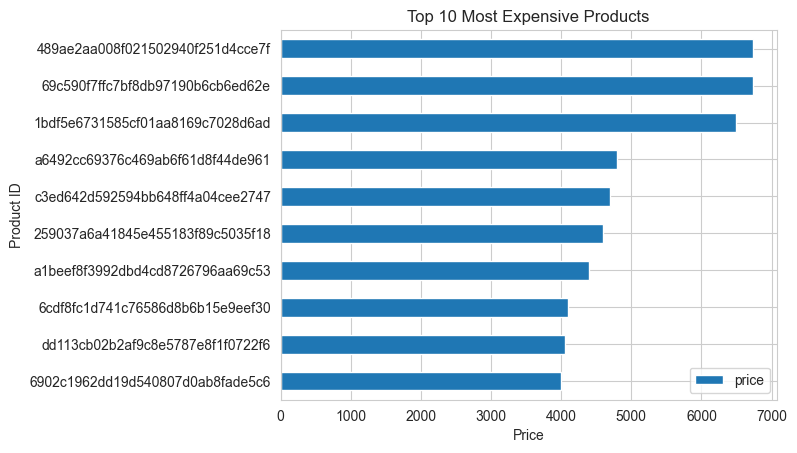

In [82]:
top_10_expensive_product.plot(kind = 'barh', x = 'product_id', y = 'price')
plt.xlabel('Price')
plt.ylabel('Product ID')
plt.title('Top 10 Most Expensive Products')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest price at the top
plt.show()

### 
      Product having product ID '489ae2aa008f021502940f251d4cce7f' having category 'Housewares' has the highest price of '6735'

### Popular categories by state

In [83]:
order_cust = pd.merge(left = order_orderpayment_cust, right = product_orderitem, how= 'left', on= 'order_id')
order_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,...,1.0,8683.0,54.0,64.0,31.0,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,...,3.0,10150.0,89.0,15.0,40.0,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:00,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,...,1.0,8267.0,52.0,52.0,17.0,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:00,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,...,1.0,12160.0,56.0,51.0,28.0,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:00,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,...,1.0,5200.0,45.0,15.0,35.0,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:00,230.00,22.25


In [84]:
(order_cust.groupby('customer_state')
            .apply(lambda group: group.groupby('product_category_name')['order_id'].count()
                    .nlargest(1))
            .reset_index(name='order_count'))

### This code provide us the popular product catrgory from each state based on number of orders placed

,customer_state,product_category_name,order_count
0,Andhra Pradesh,Bed_Bath_Table,8576
1,Arunachal Pradesh,Bed_Bath_Table,148
2,Chhattisgarh,Bed_Bath_Table,805
3,Delhi,Bed_Bath_Table,350
4,Goa,Auto,1
5,Gujarat,Bed_Bath_Table,905
6,Haryana,Bed_Bath_Table,317
7,Himachal Pradesh,Bed_Bath_Table,93
8,Jammu & Kashmir,Bed_Bath_Table,206
9,Karnataka,Bed_Bath_Table,449


### 
          From above output it is clear that in most of the states most popular product category is 'Bed Bath Table'

### Popular categories by month:

In [85]:
# Extract year and month from 'order_purchase_timestamp'
order_cust['year_month'] = order_cust['order_purchase_timestamp'].dt.to_period('M')

# Group by 'year_month' and 'product_category_name', then get the most popular category based on order count
result = (order_cust.groupby(['year_month', 'product_category_name'])
            ['order_id'].count()
            .reset_index(name='order_count')
            .groupby('year_month', group_keys=False)
            .apply(lambda group: group[group['order_count'] == group['order_count'].max()])
            .reset_index(drop=True))

# Display only necessary columns in the final result
final_result = pd.DataFrame(result[['year_month', 'product_category_name', 'order_count']])

print(final_result)

   year_month     product_category_name  order_count
0     2016-09             Health_Beauty            3
1     2016-10           Furniture_Decor           73
2     2016-12  Fashion_Bags_Accessories            1
3     2017-01           Furniture_Decor          192
4     2017-02           Furniture_Decor          269
5     2017-03            Bed_Bath_Table          370
6     2017-04            Bed_Bath_Table          382
7     2017-05            Bed_Bath_Table          509
8     2017-06            Bed_Bath_Table          467
9     2017-07            Bed_Bath_Table          681
10    2017-08            Bed_Bath_Table          650
11    2017-09            Bed_Bath_Table          640
12    2017-10            Bed_Bath_Table          657
13    2017-11            Bed_Bath_Table         1133
14    2017-12            Bed_Bath_Table          714
15    2018-01            Bed_Bath_Table         1104
16    2018-02     Computers_Accessories          983
17    2018-03            Bed_Bath_Table       

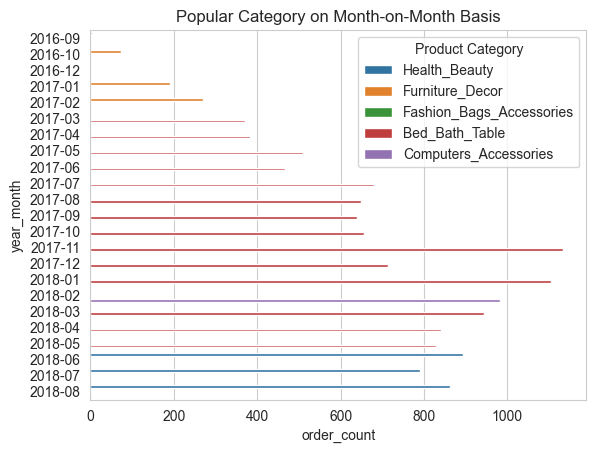

In [86]:
sns.barplot(data= final_result , y = 'year_month', x = 'order_count', hue = 'product_category_name')
plt.title('Popular Category on Month-on-Month Basis')
plt.legend(title='Product Category')
plt.show()

###
      In most of the month most popular product category is 'Bed Bath Table' 

### Customer segmentation based on revenue 

In [87]:
order_orderpayment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_month,order_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,credit_card,1.0,18.12,10,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,3.0,voucher,1.0,2.00,10,2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2.0,voucher,1.0,18.59,10,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1.0,UPI,1.0,141.46,7,2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,1.0,credit_card,3.0,179.12,8,2018


In [88]:
customer_revenue = pd.DataFrame(order_orderpayment.groupby('customer_id')['payment_value'].sum())
customer_revenue

,payment_value
customer_id,
00012a2ce6f8dcda20d059ce98491703,114.74
000161a058600d5901f007fab4c27140,67.41
0001fd6190edaaf884bcaf3d49edf079,195.42
0002414f95344307404f0ace7a26f1d5,179.35
000379cdec625522490c315e70c7a9fb,107.01
...,...
fffcb937e9dd47a13f05ecb8290f4d3e,91.91
fffecc9f79fd8c764f843e9951b11341,81.36
fffeda5b6d849fbd39689bb92087f431,63.13


In [89]:
customer_revenue.payment_value.describe()

count    96461.000000
mean       159.854064
std        218.827945
min          0.000000
25%         61.880000
50%        105.280000
75%        176.330000
max      13664.080000
Name: payment_value, dtype: float64

In [90]:
customer_revenue.payment_value.quantile(0.97)

617.93

### 
             1. Maximum payment is 13664.08 but almost 97 % of the payment value is around 600. 
             2. So dividing 5 equal groups having payment ranges: 0-150: Group1, 150-300: Group2,
                                                   300-450: Group3, 450-600: Group 4, > 600: Group 5.

In [91]:
# Define payment ranges and corresponding group labels
payment_ranges = [0, 150, 300, 450, 600, float('inf')]
group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

# Assign customers to groups based on payment ranges
customer_revenue['customer_group'] = pd.cut(customer_revenue['payment_value'], bins= payment_ranges, labels=group_labels)

In [92]:
customer_revenue

,payment_value,customer_group
customer_id,,
00012a2ce6f8dcda20d059ce98491703,114.74,Group 1
000161a058600d5901f007fab4c27140,67.41,Group 1
0001fd6190edaaf884bcaf3d49edf079,195.42,Group 2
0002414f95344307404f0ace7a26f1d5,179.35,Group 2
000379cdec625522490c315e70c7a9fb,107.01,Group 1
...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,91.91,Group 1
fffecc9f79fd8c764f843e9951b11341,81.36,Group 1
fffeda5b6d849fbd39689bb92087f431,63.13,Group 1


In [93]:
group_count = customer_revenue.customer_group.value_counts()
group_count

Group 1    65181
Group 2    21377
Group 3     5134
Group 5     3080
Group 4     1688
Name: customer_group, dtype: int64

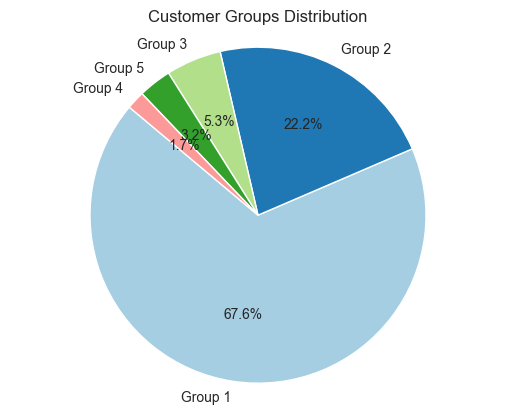

In [94]:
plt.pie(group_count, labels=group_count.index, autopct='%1.1f%%',startangle=140, colors=plt.cm.Paired.colors)
plt.title("Customer Groups Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 
           1. Maximum customers lies in Group 1 means they spend in range of 0 to 150.
           2. Around 90 % of customers lies in Group 1 & Group 2.
           3. Very few customers spend more as very less % customers lies in higher groups i.e. Group 3,4 & 5. 

### Sellers Segmentation basred on revenue

In [95]:
seller_payment = pd.merge(left = product_orderitem, right= order_payments, how= 'left', on= 'order_id')
seller_payment.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:00,10.91,7.39,1.0,debit_card,1.0,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:00,248.00,17.99,1.0,voucher,1.0,265.99
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:00,79.80,7.82,1.0,credit_card,1.0,87.62
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:00,112.30,9.54,1.0,credit_card,2.0,121.84
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:00,37.90,8.29,1.0,credit_card,4.0,46.19


In [96]:
summ_10 = pd.DataFrame(seller_payment.groupby('seller_id').payment_value.sum())
summ_10

,payment_value
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,2748.06
001cca7ae9ae17fb1caed9dfb1094831,48349.22
001e6ad469a905060d959994f1b41e4f,267.94
002100f778ceb8431b7a1020ff7ab48f,2445.64
003554e2dce176b5555353e4f3555ac8,139.38
...,...
ffcfefa19b08742c5d315f2791395ee5,79.52
ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52
ffeee66ac5d5a62fe688b9d26f83f534,2259.55


In [97]:
summ_10.describe()

,payment_value
count,3095.000000
mean,6561.594414
std,21537.946021
min,12.220000
25%,317.850000
50%,1250.660000
75%,4879.240000
max,507166.910000


In [98]:
summ_10.payment_value.quantile(0.85)

9493.390000000003

### 
     By analysing above data it is clear that 85 % of sellers have revenue less then 8000. So dividing groups such that:
                    1. 0-2500 : Group 1
                       2500-5000 : group 2
                        5000-7500 : group 3 
                        7500-1000: group 4
                        10000 and above : group 5 

In [99]:
# Define payment ranges and corresponding group labels
payment_range = [0, 2500, 5000, 7500, 10000, float('inf')]
group_label = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

# Assign customers to groups based on payment ranges
summ_10['seller_group'] = pd.cut(summ_10['payment_value'], bins= payment_range, labels=group_label)

In [100]:
summ_10

,payment_value,seller_group
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,2748.06,Group 2
001cca7ae9ae17fb1caed9dfb1094831,48349.22,Group 5
001e6ad469a905060d959994f1b41e4f,267.94,Group 1
002100f778ceb8431b7a1020ff7ab48f,2445.64,Group 1
003554e2dce176b5555353e4f3555ac8,139.38,Group 1
...,...,...
ffcfefa19b08742c5d315f2791395ee5,79.52,Group 1
ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52,Group 2
ffeee66ac5d5a62fe688b9d26f83f534,2259.55,Group 1


In [101]:
summ_11 = summ_10.seller_group.value_counts()
summ_11

Group 1    1963
Group 5     451
Group 2     370
Group 3     184
Group 4     127
Name: seller_group, dtype: int64

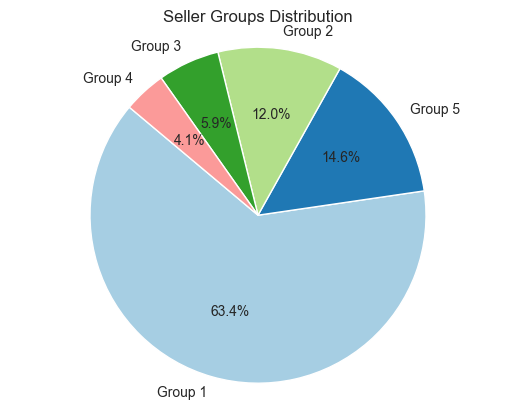

In [102]:
plt.pie(summ_11, labels=summ_11.index, autopct='%1.1f%%',startangle=140, colors=plt.cm.Paired.colors)
plt.title("Seller Groups Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 
            1. Most of the sellers generate revenue less than 2500 as around 64 % sellers lie in Group 1.
            2. Only around 15 % of suppliers generate revenue more than 10000 as they lie in Group 5.
            3. Around 75 % sellers generate revenue less than 5000. 

### Customer satisfaction (rating) towards category

In [103]:
review_category = pd.merge(left= product_orderitem, right= order_review_rating, how= 'left', on = 'order_id')
review_category.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:00,10.91,7.39,d71da8fd8c6e3adef26be965f065b8a1,5,2018-04-28,2018-05-04 00:55:00
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:00,248.00,17.99,19866247db89845ef558ef19a6c26fcd,5,2018-02-17,2018-02-18 23:24:00
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:00,79.80,7.82,32921b4e09c9a19d61fe46ce04231b84,5,2018-07-14,2018-07-16 16:20:00
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:00,112.30,9.54,70949d129965fb1ee32aaccec720a19e,1,2018-08-07,2018-08-08 11:53:00
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:00,37.90,8.29,74c9c7d0bc153bbbc92e4c1597b8ba55,5,2018-04-17,2018-04-18 04:29:00


In [104]:
# Calculate the average review score for each category
category_avg_scores = review_category.groupby('product_category_name')['review_score'].mean()
category_avg_scores

product_category_name
Agro_Industry_And_Commerce    4.000000
Air_Conditioning              3.919192
Art                           3.918660
Arts_And_Craftmanship         4.125000
Audio                         3.808219
                                ...   
Stationery                    4.181386
Tablets_Printing_Image        4.048193
Telephony                     3.935604
Toys                          4.138667
Watches_Gifts                 4.002000
Name: review_score, Length: 71, dtype: float64

In [105]:
# Top 10 maximum rated categories
top_10_max_rated = category_avg_scores.sort_values(ascending=False).head(10)
top_10_max_rated

product_category_name
Cds_Dvds_Musicals                        4.642857
Fashion_Childrens_Clothes                4.500000
Books_General_Interest                   4.439421
Books_Imported                           4.400000
Costruction_Tools_Tools                  4.359223
Books_Technical                          4.338290
Luggage_Accessories                      4.309524
Food_Drink                               4.303571
Small_Appliances_Home_Oven_And_Coffee    4.302632
Fashion_Sport                            4.258065
Name: review_score, dtype: float64

In [106]:
# Top 10 minimum rated categories
top_10_min_rated = category_avg_scores.sort_values().head(10)
top_10_min_rated

product_category_name
Security_And_Services     2.500000
Diapers_And_Hygiene       3.256410
Home_Comfort_2            3.366667
Office_Furniture          3.484421
Fashion_Male_Clothing     3.621212
Fixed_Telephony           3.671698
Party_Supplies            3.767442
Fashio_Female_Clothing    3.780000
La_Cuisine                3.785714
Audio                     3.808219
Name: review_score, dtype: float64

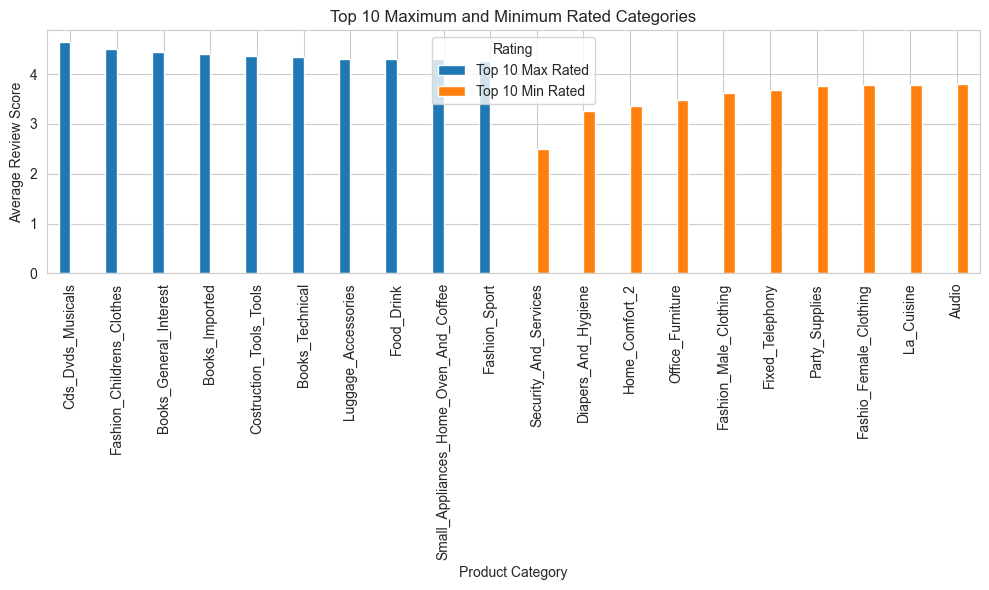

In [107]:
# Combine the data for plotting
combined_data = pd.concat([top_10_max_rated, top_10_min_rated], axis=1)
combined_data.columns = ['Top 10 Max Rated', 'Top 10 Min Rated']

# Create a grouped bar chart
ax = combined_data.plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Maximum and Minimum Rated Categories")
plt.ylabel("Average Review Score")
plt.xlabel("Product Category")
plt.legend(title="Rating")
plt.tight_layout()
plt.show()

### 
                'Cds_Dvds_Musicals' are the most rated categories & 'Security_And_Services' are the least rated category.

### Customer satisfaction (rating) towards products

In [108]:
# Calculate the average review score for each product
product_rating = pd.DataFrame(review_category.groupby('product_id')['review_score'].mean())
product_rating

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
00088930e925c41fd95ebfe695fd2655,4.0
0009406fd7479715e4bef61dd91f2462,1.0
000b8f95fcb9e0096488278317764d19,5.0
000d9be29b5207b54e86aa1b1ac54872,5.0
...,...
fff6177642830a9a94a0f2cba5e476d1,4.5
fff81cc3158d2725c0655ab9ba0f712c,4.0
fff9553ac224cec9d15d49f5a263411f,5.0


In [109]:
# Group by review_score and count the occurrences
score_counts = product_rating["review_score"].value_counts()

# Calculate the percentage count
total_count = len(product_rating)
score_counts_percent = (score_counts / total_count) * 100

# Create a new DataFrame to display the results
result_df = pd.DataFrame({
    "Count": score_counts,
    "Percentage": score_counts_percent
})

# Display the result with sorting based on count
result_df.sort_values(by="Count", ascending=False, inplace=True)

# Print the final DataFrame
print(result_df)

          Count  Percentage
5.000000  13970   42.396285
4.000000   4680   14.202907
1.000000   2790    8.467118
3.000000   2496    7.574884
4.500000   1323    4.015053
...         ...         ...
4.620690      1    0.003035
3.983333      1    0.003035
4.812500      1    0.003035
3.437500      1    0.003035
4.225000      1    0.003035

[670 rows x 2 columns]


In [110]:
top_5 = result_df.head(5)
top_5

,Count,Percentage
5.0,13970,42.396285
4.0,4680,14.202907
1.0,2790,8.467118
3.0,2496,7.574884
4.5,1323,4.015053


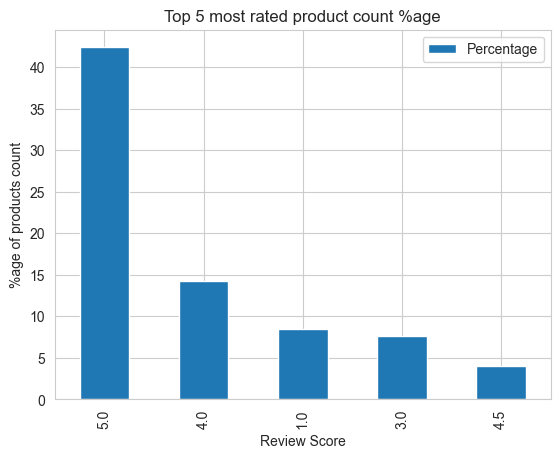

In [111]:
top_5.plot(kind = 'bar', y = 'Percentage')
plt.xlabel('Review Score')
plt.ylabel('%age of products count')
plt.title('Top 5 most rated product count %age')
plt.show()

###
       1. Most of the products (42.4 %) were rated 5 which was maximum rating.
       2. Only 8.4 % of products rated 1 which was minimum rating.

### Average rating by month

In [112]:
order_review_rating.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:00


In [113]:
# Step 1: Extract month and year from 'review_creation_date'
order_review_rating['review_month'] = order_review_rating['review_creation_date'].dt.month
order_review_rating['review_year'] = order_review_rating['review_creation_date'].dt.year

# Step 2: Group by 'review_month', and 'review_year'
summ_12 = order_review_rating.groupby(['review_year', 'review_month'])

# Step 3: Calculate avg review_score for each group
review_permonth = pd.DataFrame(summ_12['review_score'].mean().reset_index())

print(review_permonth)

    review_year  review_month  review_score
0          2016            10      4.033149
1          2016            11      3.166667
2          2016            12      2.270833
3          2017             1      4.338912
4          2017             2      4.269663
5          2017             3      4.012774
6          2017             4      4.025641
7          2017             5      4.086456
8          2017             6      4.109290
9          2017             7      4.167610
10         2017             8      4.213104
11         2017             9      4.164939
12         2017            10      4.170112
13         2017            11      4.098466
14         2017            12      3.913087
15         2018             1      4.045833
16         2018             2      3.990921
17         2018             3      3.711778
18         2018             4      3.902993
19         2018             5      4.179071
20         2018             6      4.189502
21         2018             7   

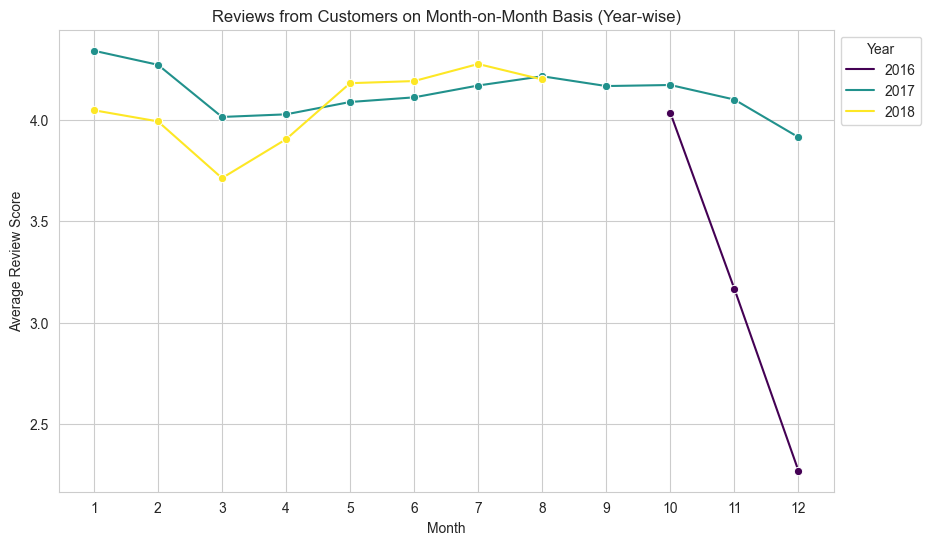

In [114]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=review_permonth, x='review_month', y='review_score', hue='review_year', marker='o', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Average Review Score')
plt.title('Reviews from Customers on Month-on-Month Basis (Year-wise)')
plt.xticks(range(1, 13))
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()

### 
        1. In year 2017 average review score was near or above 4 throughout the year which was good.
        2. In year 2018 except in month of march average review score was near or above 4.
        3. For december we have data of only 3 months, but among all the years and months average review score for month of             decemeber of year 2016 was the least.

### Average Rating by Location

In [116]:
order_orderreview = pd.merge(left = orders, right= order_review_rating, how= 'left', on= 'order_id')
order_orderreview

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,year,review_id,review_score,review_creation_date,review_answer_timestamp,review_month,review_year
0,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:00,2016-09-15 12:16:00,2016-11-07 17:11:00,2016-11-09 07:47:00,2016-10-04,9,2016,6916ca4502d6d3bfd39818759d55d536,1,2016-10-06,2016-10-07 18:32:00,10,2016
1,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:00,2016-10-06 15:50:00,2016-10-23 14:02:00,2016-10-26 14:02:00,2016-10-27,10,2016,9fe0f66724df77fd63fcc0c94a323978,4,2016-10-26,2016-10-30 21:32:00,10,2016
2,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:00,2016-10-06 16:03:00,2016-10-21 16:33:00,2016-10-27 18:19:00,2016-11-07,10,2016,dc62f1e20d7f280e54066b6a92841086,4,2016-10-28,2016-10-29 11:29:00,10,2016
3,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:00,2016-10-04 10:18:00,2016-10-25 12:14:00,2016-11-08 10:58:00,2016-11-25,10,2016,f9fe37d91c506b29a0b4d9107f667bde,1,2016-11-09,2016-11-09 21:04:00,11,2016
4,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:00,2016-10-05 03:11:00,2016-10-25 11:57:00,2016-11-03 10:58:00,2016-11-29,10,2016,657654f17abc5a7ce8290f148efb3dd3,3,2016-11-04,2016-11-04 23:45:00,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96993,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:00,2018-08-29 12:35:00,2018-08-29 13:38:00,2018-08-30 22:48:00,2018-09-03,8,2018,7a11bf826668febba0800ec35884958c,1,2018-08-31,2018-09-21 13:54:00,8,2018
96994,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:00,2018-08-29 14:30:00,2018-08-29 18:51:00,2018-08-30 16:52:00,2018-09-11,8,2018,39eae4e4d255222202c4255e8eee9084,5,2018-08-31,2018-09-02 20:55:00,8,2018
96995,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:00,2018-08-29 14:31:00,2018-08-29 15:29:00,2018-08-30 16:24:00,2018-09-04,8,2018,6c50d16eb583d5db7e841b77e89b7045,5,2018-08-31,2018-10-24 16:27:00,8,2018
96996,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:00,2018-08-29 20:01:00,2018-08-30 16:36:00,2018-09-03,8,2018,8a8ebb5019795478156fa952acd050b1,3,2018-08-31,2018-08-31 20:02:00,8,2018


In [117]:
customer_review = pd.merge(left = order_orderreview, right = customers, how= 'left', on= 'customer_id')
customer_review.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,year,review_id,review_score,review_creation_date,review_answer_timestamp,review_month,review_year,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:00,2016-09-15 12:16:00,2016-11-07 17:11:00,2016-11-09 07:47:00,2016-10-04,9,2016,6916ca4502d6d3bfd39818759d55d536,1,2016-10-06,2016-10-07 18:32:00,10,2016,830d5b7aaa3b6f1e9ad63703bec97d23,14600,Kandukur,Andhra Pradesh
1,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:00,2016-10-06 15:50:00,2016-10-23 14:02:00,2016-10-26 14:02:00,2016-10-27,10,2016,9fe0f66724df77fd63fcc0c94a323978,4,2016-10-26,2016-10-30 21:32:00,10,2016,32ea3bdedab835c3aa6cb68ce66565ef,4106,Akkarampalle,Andhra Pradesh
2,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:00,2016-10-06 16:03:00,2016-10-21 16:33:00,2016-10-27 18:19:00,2016-11-07,10,2016,dc62f1e20d7f280e54066b6a92841086,4,2016-10-28,2016-10-29 11:29:00,10,2016,2f64e403852e6893ae37485d5fcacdaf,98280,Mahilpur,Punjab
3,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:00,2016-10-04 10:18:00,2016-10-25 12:14:00,2016-11-08 10:58:00,2016-11-25,10,2016,f9fe37d91c506b29a0b4d9107f667bde,1,2016-11-09,2016-11-09 21:04:00,11,2016,b8b8726af116a5cfb35b0315ecef9172,22770,Badepalle,Andhra Pradesh
4,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:00,2016-10-05 03:11:00,2016-10-25 11:57:00,2016-11-03 10:58:00,2016-11-29,10,2016,657654f17abc5a7ce8290f148efb3dd3,3,2016-11-04,2016-11-04 23:45:00,11,2016,61db744d2f835035a5625b59350c6b63,90040,Eluru,Andhra Pradesh


In [118]:
avg_review_state = pd.DataFrame(customer_review.groupby('customer_state')['review_score'].mean().sort_values(ascending = False))
avg_review_state['review_score'] = avg_review_state['review_score'].apply(lambda x: '{:.2f}'.format(x))

In [119]:
avg_review_state

,review_score
customer_state,
Goa,4.80
Punjab,4.24
Haryana,4.22
Tamil Nadu,4.22
Rajasthan,4.22
Uttar Pradesh,4.21
Kerala,4.20
Orissa,4.19
Maharashtra,4.19


<Figure size 1000x600 with 0 Axes>

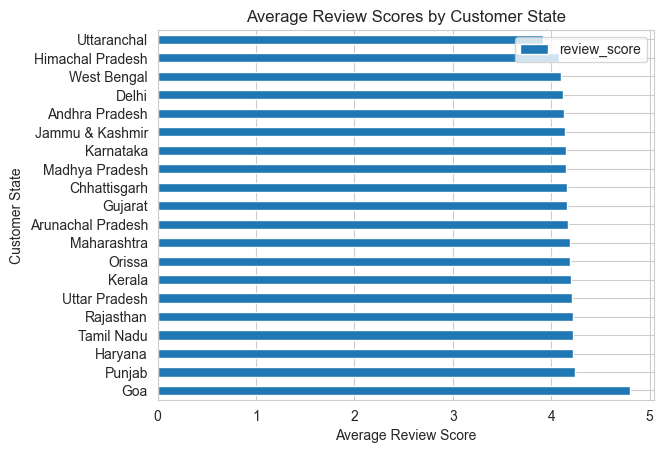

In [120]:
# Convert the review_score column to numeric
avg_review_state['review_score'] = pd.to_numeric(avg_review_state['review_score'])

# Plotting
plt.figure(figsize=(10, 6))
avg_review_state.plot(kind='barh')
plt.title('Average Review Scores by Customer State')
plt.ylabel('Customer State')
plt.xlabel('Average Review Score')
plt.show()

### 
       1. Avg review score in most of the states 4.0 to 4.2 which was quite good.
       2. Max avg review score was from Goa which was 4.8.

In [121]:
customer_review.customer_state.value_counts()

Andhra Pradesh       59102
Gujarat               7281
Chhattisgarh          6216
Karnataka             3774
Delhi                 3247
Madhya Pradesh        2795
Haryana               2147
Tamil Nadu            2084
Maharashtra           1957
Jammu & Kashmir       1506
Kerala                1500
Arunachal Pradesh     1112
Uttar Pradesh         1009
Rajasthan              798
Himachal Pradesh       721
Punjab                 669
Orissa                 615
West Bengal            358
Uttaranchal             97
Goa                     10
Name: customer_state, dtype: int64

### It is clear we have maximum data available for andhra pradesh. So let's find out city wise average review score for andhra pradesh

In [122]:
andhra_review = customer_review[customer_review.customer_state == 'Andhra Pradesh']
andhra_review.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,year,review_id,review_score,review_creation_date,review_answer_timestamp,review_month,review_year,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:00,2016-09-15 12:16:00,2016-11-07 17:11:00,2016-11-09 07:47:00,2016-10-04,9,2016,6916ca4502d6d3bfd39818759d55d536,1,2016-10-06,2016-10-07 18:32:00,10,2016,830d5b7aaa3b6f1e9ad63703bec97d23,14600,Kandukur,Andhra Pradesh
1,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:00,2016-10-06 15:50:00,2016-10-23 14:02:00,2016-10-26 14:02:00,2016-10-27,10,2016,9fe0f66724df77fd63fcc0c94a323978,4,2016-10-26,2016-10-30 21:32:00,10,2016,32ea3bdedab835c3aa6cb68ce66565ef,4106,Akkarampalle,Andhra Pradesh
3,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:00,2016-10-04 10:18:00,2016-10-25 12:14:00,2016-11-08 10:58:00,2016-11-25,10,2016,f9fe37d91c506b29a0b4d9107f667bde,1,2016-11-09,2016-11-09 21:04:00,11,2016,b8b8726af116a5cfb35b0315ecef9172,22770,Badepalle,Andhra Pradesh
4,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:00,2016-10-05 03:11:00,2016-10-25 11:57:00,2016-11-03 10:58:00,2016-11-29,10,2016,657654f17abc5a7ce8290f148efb3dd3,3,2016-11-04,2016-11-04 23:45:00,11,2016,61db744d2f835035a5625b59350c6b63,90040,Eluru,Andhra Pradesh
5,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:00,2016-10-04 10:28:00,2016-10-21 14:23:00,2016-10-31 11:07:00,2016-11-23,10,2016,444d04d7ca0131b3b40619f81d0facd5,1,2016-11-01,2016-11-02 16:52:00,11,2016,8d3a54507421dbd2ce0a1d58046826e0,13185,Narsipatnam,Andhra Pradesh


In [123]:
avg_review_city = pd.DataFrame(andhra_review.groupby('customer_city')['review_score'].mean().sort_values(ascending = False))
avg_review_city['review_score'] = avg_review_city['review_score'].apply(lambda x: '{:.2f}'.format(x))

In [124]:
avg_review_city

,review_score
customer_city,
Yerraguntla,5.00
Kavali,5.00
Kovvur,5.00
Kukatpalle,5.00
Manugur,5.00
...,...
Bollaram,3.28
Parvathipuram,3.17
Warangal,3.00


In [125]:
top_10_highest_rated_city = avg_review_city.head(10)
top_10_highest_rated_city

,review_score
customer_city,
Yerraguntla,5.00
Kavali,5.00
Kovvur,5.00
Kukatpalle,5.00
Manugur,5.00
Narasaraopet,4.88
Markapur,4.82
Omerkhan daira,4.79
Sirsilla,4.71


In [126]:
bottom_10_lowest_raetd_city = avg_review_city.tail(10)
bottom_10_lowest_raetd_city

,review_score
customer_city,
Tadpatri,3.50
Singarayakonda,3.50
Mandapeta,3.50
Srisailamgudem Devasthanam,3.50
Sangareddy,3.38
Bollaram,3.28
Parvathipuram,3.17
Warangal,3.00
Tallapalle,2.93


In [128]:
# Combine the data for plotting
combined_data_1 = pd.concat([top_10_highest_rated_city, bottom_10_lowest_raetd_city], axis=1)
combined_data_1.columns = ['Top 10 Max Rated', 'Top 10 Min Rated']

In [129]:
combined_data_1

,Top 10 Max Rated,Top 10 Min Rated
customer_city,,
Yerraguntla,5.00,NaN
Kavali,5.00,NaN
Kovvur,5.00,NaN
Kukatpalle,5.00,NaN
Manugur,5.00,NaN
Narasaraopet,4.88,NaN
Markapur,4.82,NaN
Omerkhan daira,4.79,NaN
Sirsilla,4.71,NaN


In [132]:
# Convert the review_score column to numeric
combined_data_1['Top 10 Max Rated'] = pd.to_numeric(combined_data_1['Top 10 Max Rated'])
combined_data_1['Top 10 Min Rated'] = pd.to_numeric(combined_data_1['Top 10 Min Rated'])

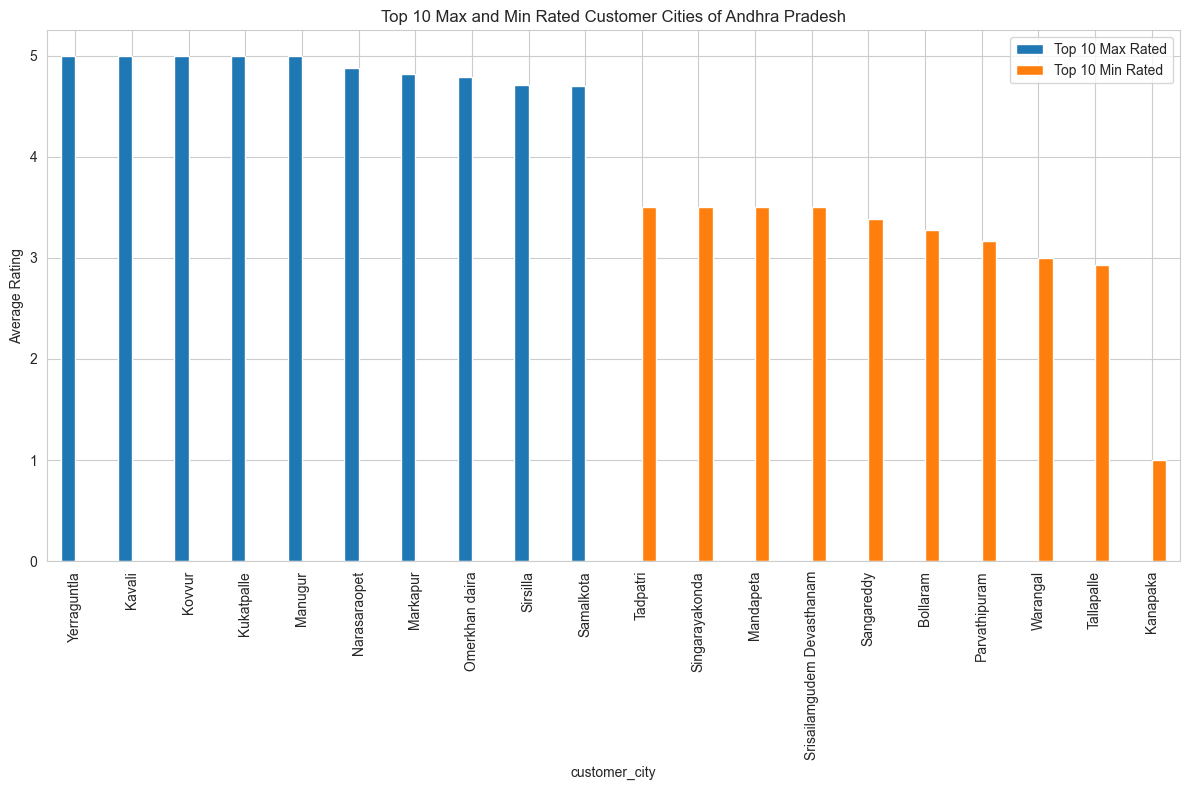

In [134]:
# Create a grouped bar chart
ax = combined_data_1.plot(kind='bar', figsize=(12, 8))
ax.set_ylabel('Average Rating')
ax.set_title('Top 10 Max and Min Rated Customer Cities of Andhra Pradesh')
plt.tight_layout()
plt.show()

### Top 10 combinations of products selling together

In [156]:
order_orderpayment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_month,order_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,credit_card,1.0,18.12,10,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,3.0,voucher,1.0,2.00,10,2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2.0,voucher,1.0,18.59,10,2017
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1.0,UPI,1.0,141.46,7,2018
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,1.0,credit_card,3.0,179.12,8,2018


In [157]:
product_orderitem.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:00,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:00,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:00,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:00,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:00,37.90,8.29


In [151]:
# combinations is used from the itertools module to generate combinations of elements from a sequence
from itertools import combinations

# Merge the two DataFrames based on 'order_id'
merged_df = pd.merge(order_orderpayment, product_orderitem, on='order_id')

# Group by 'order_id' and aggregate the 'product_id' values into lists
order_product_groups = merged_df.groupby('order_id')['product_id'].apply(list)

# Initialize an empty dictionary to store combination counts
combination_counts = {}

for products in order_product_groups:
    combinations_2 = list(combinations(products, 2))
    combinations_3 = list(combinations(products, 3))
    
    for combination in combinations_2:
        if combination in combination_counts:
            combination_counts[combination][0] += 1
        else:
            combination_counts[combination] = [1, 2]  # Second element indicates 2-product combination
            
    for combination in combinations_3:
        if combination in combination_counts:
            combination_counts[combination][0] += 1
        else:
            combination_counts[combination] = [1, 3]  # Second element indicates 3-product combination

combination_df = pd.DataFrame(combination_counts.items(), columns=['Combination', 'Count_and_Type'])

combination_df['Count'] = combination_df['Count_and_Type'].apply(lambda x: x[0])
combination_df['Combination_Type'] = combination_df['Count_and_Type'].apply(lambda x: x[1])
combination_df.drop(columns=['Count_and_Type'], inplace=True)

sorted_combinations = combination_df.sort_values(by='Count', ascending=False)

top_10_combinations = sorted_combinations.head(10).reset_index(drop=True)

In [152]:
### Top 10 cross selling combinations:

top_10_combinations

,Combination,Count,Combination_Type
0,"(ebf9bc6cd600eadd681384e3116fda85, ebf9bc6cd60...",11480,3
1,"(0554911df28fda9fd668ce5ba5949695, 0554911df28...",8436,3
2,"(ebf9bc6cd600eadd681384e3116fda85, ebf9bc6cd60...",6391,3
3,"(ebf9bc6cd600eadd681384e3116fda85, 5ddab10d5e0...",6160,3
4,"(5ddab10d5e0a23acb99acf56b62b3276, ebf9bc6cd60...",5530,3
5,"(5ddab10d5e0a23acb99acf56b62b3276, ebf9bc6cd60...",3080,3
6,"(ebf9bc6cd600eadd681384e3116fda85, 5ddab10d5e0...",3080,3
7,"(5ddab10d5e0a23acb99acf56b62b3276, 5ddab10d5e0...",2660,3
8,"(8d37ee446981d3790967d0268d6cfc81, 8d37ee44698...",2600,3
9,"(4e53a453045707bbc5febcf5f32097ac, 4e53a453045...",2024,3


### The above result shown Top 10 cross selling combinations:
    Combination: This column represents the combination of product IDs that are sold toghether. We made a group of either 2 or 3 combinations.
    Count: This column indicates how many times the specific combination appeared in dataset.
    Combination Type: It shows whether combination consists 2 product Id's or 3 product ID's.
    	
        
    This information can be useful for identifying which combinations of products are frequently bought together.

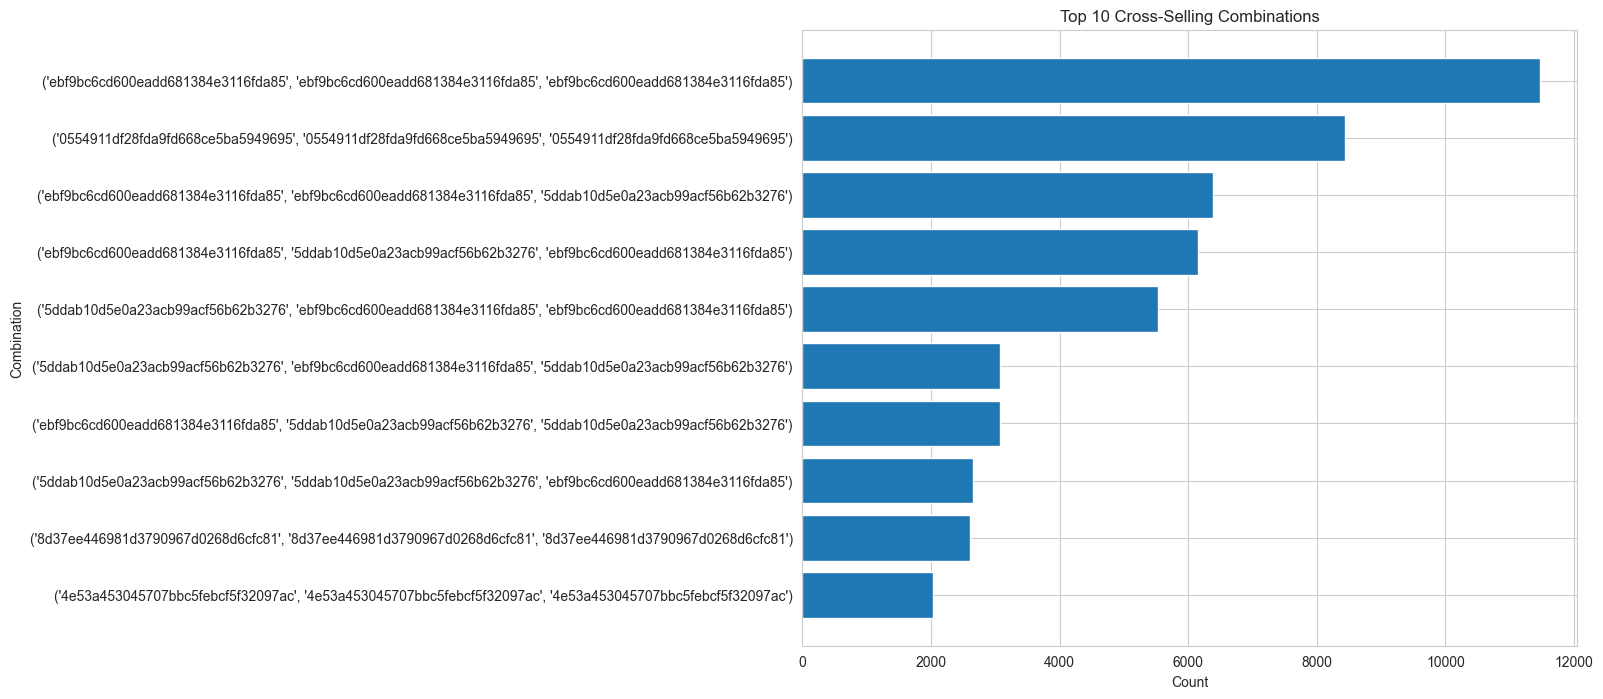

In [155]:
plt.figure(figsize=(10, 8))
plt.barh(top_10_combinations['Combination'].astype(str), top_10_combinations['Count'])
plt.xlabel('Count')
plt.ylabel('Combination')
plt.title('Top 10 Cross-Selling Combinations')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()